Projekti kirjeldus



Luua mudel, mis ennustab laenuvõtjate krediidvõimet ja otsustab, kas anda neile laen või mitte.



Andmete kogumine: Kuna meil otseselt pole “reaalseid” panga andmeid, siis võtaksime mudeli treenimiseks ja testimiseks internetist(nt: UCI Machine Learning Repository)


Andmete ettevalmistamine: Töötleme andmeid masinõppe mudeli koolitamiseks (test & train setid) ning vajadusel kodeerime ja standardiseerime andmeid ümber, et eemaldada puuduvaid väärtuseid jne.


Mudeli koolitamine ja valik: Testime erinevaid mudeleid erinevate parameetritega mis teeks ennustusi parima täpsusega (nt logistiline regressioon või decision tree vms). (Vajadusel jaotamine treeningandmed omakorda treening- ja valideerimisandmeteks, et test andmed poleks lõpuks liiga kallutatud) 


Mudeli hindamine: Kui hästi mudel töötas ning kas mudel suudab ennustada või mitte (siin kasutame testandmeid)


Tulemuste visualiseerimine: Visualiseerida konkreetseid otsuseid ja mudelit ennast.


Eesmärk: Õppida kasutama erinevaid librarysi(matplotlib, sklearn, pandas,numpy), saada parem ettekujutus andmetöötlusest Pythonis, teha võimalikult loogilise ülesehitusega projekt ja õppida tööjaotust programmeerimises.


Projekti valisime, kuna on see seotud meie erialaga ja aitab siduda mitmeid praeguseid õppeaineid. Lisaks võib olla kasuks tulevikus tööle kandideerides või lihtsalt enda tarbeks kasutamiseks.



# Andmete esmane töötlus

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("clean_dataset.csv",sep=(","))
data

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


**Eemaldame ebavajalikud andmed (mudel ei diskrimineeri)**

In [2]:
data.drop(columns=(["Industry","Ethnicity","DriversLicense","ZipCode","Citizen"]),axis=1,inplace=True)
data

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,1.25,0,0,0,0,0
686,0,22.67,0.750,1,1,2.00,0,1,2,394,0
687,0,25.25,13.500,0,0,2.00,0,1,1,1,0
688,1,17.92,0.205,1,1,0.04,0,0,0,750,0


**Kontroll, et andmete "labelid" oleksid tasakaalus (Kui oleks näiteks 0 ja 1 suhe 1/10 vms siis mudelid annaks ebakorrektseid tulemusi, sest mudelite treening oleks kallutatud)**

In [3]:
data["Approved"].value_counts()

Approved
0    383
1    307
Name: count, dtype: int64

# Mõned joonised andmetest

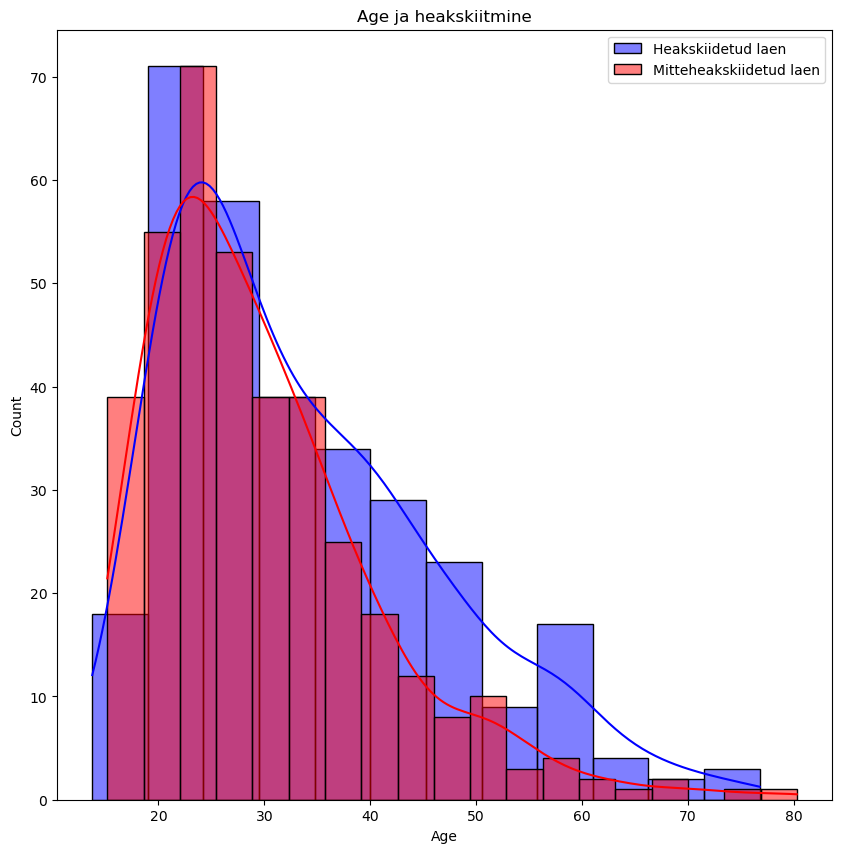

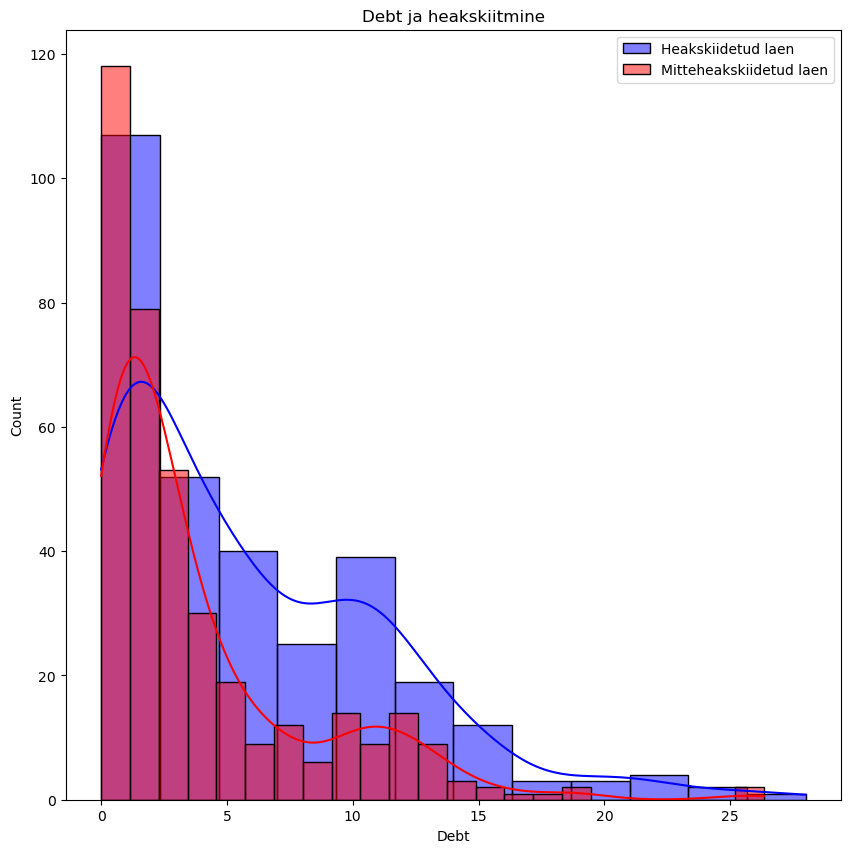

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

heakskiidetud_data = data[data["Approved"] == 1]
mitteheakskiidetud_data = data[data["Approved"] == 0]

features = ["Age", "Debt",]

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.histplot(heakskiidetud_data[feature], kde=True, color="blue", label="Heakskiidetud laen")
    sns.histplot(mitteheakskiidetud_data[feature], kde=True, color="red", label="Mitteheakskiidetud laen")
    plt.title(f"{feature} ja heakskiitmine")
    plt.xlabel(feature)
    plt.ylabel("Count")
    
    plt.legend()
    plt.show()

**Joonistelt võib tõlgendada, et näiteks laenu heakskiitmise ja vanuse vaheline jaotus on "skewed right" ehk väärtuseed langevad 20-40 aastaste gruppi - Nooremad inimesed taotlevad rohkem laene<br>
Samuti on näha ka võlakoormuse puhul, et võla suurenedes ületab "heakskiidetud" histogrammid "mitteheakskiidetud" histogramme, mis viitab asjaolule, et võlakoormuse suurenedes antakse endiselt laene välja (võib eeldada, et võlataotlejatel on siis võla katmiseks piisav sissetulek või muud hinnatavad kriteerimud võlasualdajate poolt täidetud).**

# Andmete treening, testimise ja valideerimise setide loomine (uuendatud peale projekti 1. versiooni tagasisidet)

In [5]:
y=data["Approved"]
x=data.drop(["Approved"],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2 )

# Hea tava on kasutada vastavalt 80% treenimiseks ja 20% testimiseks, aga see sõltub alati ka andmetest ise

# Mudelite Treenimine

**Kuna klassifikatsioon on binaarne, siis kasutame andmeid järgmistel mudelitel:**<br>
Random, forest, Decision Tree Classifier, KNN, SVM(liner, poly, rbf)


**Kuna SVM mudelite treenimine on tundlik muutujate skaaladele (väärtuste varieeruvus) ning nende mudelite treenimine on seetõttu aja- ja mahukulukas,
siis muutujate standardiseerimine teeb selle efektiivsemaks (Kui muutujate väärtused varieeruvad liigselt on raske leida korrektne hüpertasand (hyperplane)).**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


In [7]:
from sklearn.svm import SVC
SVM_rbf = SVC(kernel="rbf", gamma="auto",random_state=3).fit(X_train_scaled,y_train)
SVM_poly = SVC(kernel="poly", gamma="auto",random_state=3).fit(X_train_scaled,y_train)
SVM_linear = SVC(kernel="linear",random_state=3).fit(X_train_scaled,y_train)


In [8]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Random_forest = RandomForestClassifier(criterion="gini",random_state=2).fit(X_train_scaled,y_train)

Decision_tree = DecisionTreeClassifier(criterion="gini",splitter="best",random_state=2).fit(X_train_scaled,y_train)

KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski").fit(X_train_scaled,y_train)



# Ennustuste tegemine



In [9]:
models={Random_forest: None, Decision_tree: None, KNN: None ,SVM_rbf: None ,SVM_poly: None ,SVM_linear: None}

for model_name, model in models.items():
    predictions = model_name.predict(X_test_scaled)
    models[model_name] = predictions
    


# Mudelite ennustuste tulemused

In [10]:
# Ennustatud labelid ehk 1 - Anda laenu ja 0 - Ei anna laenu


predictions = {}

for model_name, pred in models.items():
    counts = np.bincount(pred)
    predictions[model_name] = {"1": counts[1], "0": counts[0]}

predictions_df = pd.DataFrame(predictions).T
predictions_df.index = ["Random Forest", "Decision Tree", "KNN", "SVM RBF", "SVM Poly", "SVM Linear"]

predictions_df

,1,0
Random Forest,64,74
Decision Tree,68,70
KNN,69,69
SVM RBF,73,65
SVM Poly,73,65
SVM Linear,76,62


# Tulemuslikkuse hindamine
$$accuracy=\frac{TP+TN}{Total}$$<br>
$$recall=\frac{TP}{TP+FN}$$<br>
$$precision=\frac{TP}{TP +FP}$$<br>

**Accuracy - Õiged ennustused (TP ja TN) kõikidest ennustustest - Üleüldisem mudeli hinnang**<br>
**Recall - Õigete positiivsete hulk kõikidest positiivsetest - Kui hästi mudel tabab kõiki "olulisi" tulemusi**<br>
**Precision - Õigete positiivsete hulk ennustatud positiivsetest - Kui hästi mudel väldib FP (vale positiivsed) vigu**<br>

**Siin loome "Confusion Matrix"-d, et hinnata/vaadta kui täpselt mudel ennustas õigesti ja valesti**

| ACTUAL \ PREDICTED | 0 (Negative) | 1 (Positive) | Total        |
|--------------------|---------------|---------------|--------------|
| **ACTUAL 0 (Negative)** | TN            | FP            | TN + FP      |
| **ACTUAL 1 (Positive)** | FN            | TP            | FN + TP      |
| **Total**              | FN + TN        | TP + FP        | FN + TP + TN + FP |

In [11]:
from sklearn.metrics import confusion_matrix

Models_CMs=[]
for model_name, prediciton in models.items():
    cm=confusion_matrix(y_test, prediciton)
    Models_CMs.append((model_name,cm))
    
n=0
for i in Models_CMs:
    print(predictions_df.index[n],"\n",i[1])
    n+=1


Random Forest 
 [[64  6]
 [10 58]]
Decision Tree 
 [[57 13]
 [13 55]]
KNN 
 [[61  9]
 [ 8 60]]
SVM RBF 
 [[59 11]
 [ 6 62]]
SVM Poly 
 [[58 12]
 [ 7 61]]
SVM Linear 
 [[57 13]
 [ 5 63]]


# Mudelite accuracy, precision ja recall
**Loome maatriksi kõikide mudelite ja nende tulemuslikkuse hinnangute kohta, et võrrelda/tõlgendada tulemuslikkust**

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for model, predictions in models.items():
    accuracy[model]=accuracy_score(y_test,predictions)
    precision[model]=precision_score(y_test,predictions)
    recall[model]=recall_score(y_test,predictions)

Mudelid = pd.DataFrame({'Accuracy': accuracy.values(), 'Precision': precision.values(), 'Recall': recall.values()}, index=predictions_df.index)
Mudelid


,Accuracy,Precision,Recall
Random Forest,0.884058,0.906250,0.852941
Decision Tree,0.811594,0.808824,0.808824
KNN,0.876812,0.869565,0.882353
SVM RBF,0.876812,0.849315,0.911765
SVM Poly,0.862319,0.835616,0.897059
SVM Linear,0.869565,0.828947,0.926471


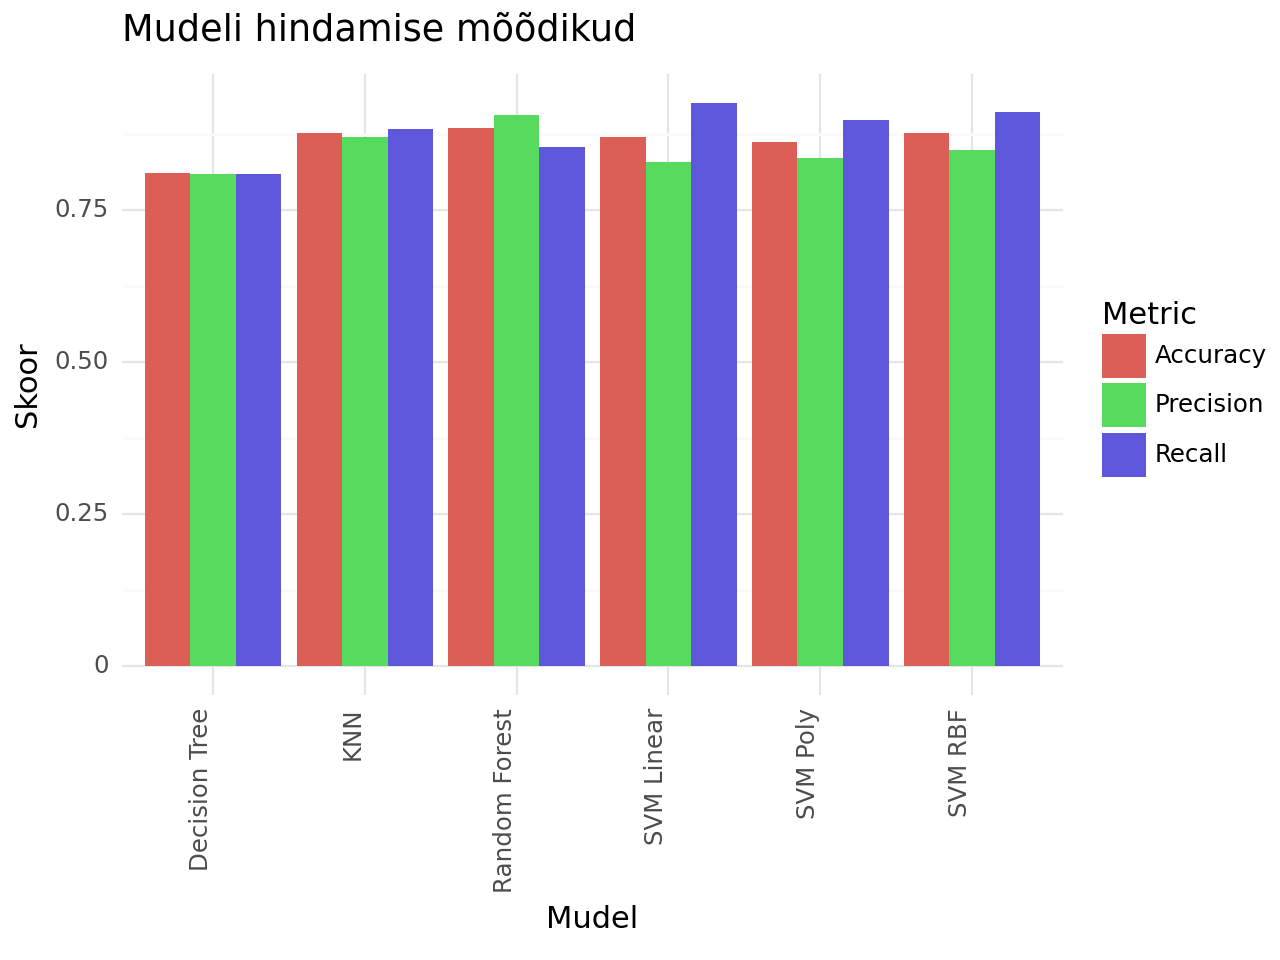

<Figure Size: (640 x 480)>

In [13]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, element_text, theme


Mudelid.reset_index(inplace=True)

melted_mudelid = Mudelid.melt(id_vars='index', var_name='Metric', value_name='Score')

plot = (ggplot(melted_mudelid, aes(x='index', y='Score', fill='Metric')) +
        geom_bar(stat='identity', position='dodge') +
        theme_minimal() +
        labs(title='Mudeli hindamise mõõdikud',
             x='Mudel',
             y='Skoor') +
        theme(axis_text_x=element_text(angle=90, hjust=1))) 
plot

**Nagu jooniselt näha hindavad kõik antud mudelid test seti peal üsna täpselt, kõige paremini teevad seda Random forest ja Decision Tree mudelid vastavalt täpsustega 0.90 ja 0.93**

# Parameetrite tuunimine


In [14]:

Random_forest = RandomForestClassifier(criterion="gini",random_state=2).fit(X_train_scaled,y_train)

Decision_tree = DecisionTreeClassifier(criterion="gini",splitter="best",random_state=2).fit(X_train_scaled,y_train)

KNN = KNeighborsClassifier(n_neighbors=5, metric="minkowski").fit(X_train_scaled,y_train)


In [15]:
from sklearn.metrics import roc_auc_score
def evaluation (y, model, X):
    score = roc_auc_score(y, model.predict_proba(X)[:, 1])
    predictions = model.predict(X)
    acc=accuracy_score(y,predictions)
    prec=precision_score(y,predictions)
    recalle=recall_score(y,predictions)
    return f'ROC-AUC score: {round(score,3)}\nAccuracy score: {round(acc,3)}\nPrecision score: {round(prec,3)}\nRecall: {round(recalle,3)}'

print(evaluation(y_test, Random_forest, X_test_scaled))
print(evaluation(y_test, Decision_tree, X_test_scaled))
print(evaluation(y_test, KNN, X_test_scaled))


ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853
ROC-AUC score: 0.812
Accuracy score: 0.812
Precision score: 0.809
Recall: 0.809
ROC-AUC score: 0.917
Accuracy score: 0.877
Precision score: 0.87
Recall: 0.882


In [16]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators" : [50, 100, 200], # Number of trees in the forest
    'max_depth' : [None, 10, 30, 50], # Max depth of the tree (None: Nodes are expanded till all leaves are pure or < min_samp_s)
    'min_samples_split' : [2, 5, 10] # Min sample req for split (May prevent oferfitting)
}

dt_params = {
    "max_depth" : [None, 10, 30, 50],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1,2, 4] # Min samples in a leaf node (prevent very small leafes to be created)
}

knn_params = {
    "n_neighbors" : [3, 5, 9], # Number of neighbors
    "weights" : ["uniform", "distance"], # Unfirom: neighbors are equal, Distance: More importance for the closer neighbors
    "p" : [1, 2] # 1:mahattan distance (only vertical and horizontal distance), 2: euclidean_distance (shortest distance)
}

In [17]:
rf_random_search = RandomizedSearchCV(Random_forest, param_distributions=rf_params, n_iter=10, cv=5, random_state=2)
rf_random_search.fit(X_train, y_train)
best_rf_params = rf_random_search.best_params_

In [18]:
dt_random_search = RandomizedSearchCV(Decision_tree, param_distributions=dt_params, n_iter=10, cv=5, random_state=2)
dt_random_search.fit(X_train, y_train)
best_dt_params = dt_random_search.best_params_

In [19]:
knn_random_search = RandomizedSearchCV(KNN, param_distributions=knn_params, n_iter=10, cv=5, random_state=2)
knn_random_search.fit(X_train, y_train)
best_knn_params = knn_random_search.best_params_

In [20]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10)

In [21]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=4)

In [22]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
print("Validation set results for RANDOM FOREST")
print(evaluation(y_val,best_rf, X_val_scaled))
print("Validation set results for DECISION TREE")
print(evaluation(y_val,best_dt, X_val_scaled))
print("Validation set results for KNN")
print(evaluation(y_val,best_knn, X_val_scaled))

Validation set results for RANDOM FOREST
ROC-AUC score: 0.937
Accuracy score: 0.874
Precision score: 0.767
Recall: 0.892
Validation set results for DECISION TREE
ROC-AUC score: 0.895
Accuracy score: 0.865
Precision score: 0.789
Recall: 0.811
Validation set results for KNN
ROC-AUC score: 0.921
Accuracy score: 0.874
Precision score: 0.767
Recall: 0.892


# Kuna Random Forest annab kõige paremaid tulemusi, siis proovime sellega veel erinevaid parameetreid läbi

In [24]:
rf_params2 = {
    "n_estimators": [250, 300, 350], 
    'max_depth': [35, 40, 45], 
    'min_samples_split': [30, 35, 40]
}

rf_random_search_2 = RandomizedSearchCV(Random_forest, param_distributions=rf_params2, n_iter=10, cv=5, random_state=2)
rf_random_search_2.fit(X_train_scaled, y_train)
best_rf_params2 = rf_random_search_2.best_params_
best_rf_2 = RandomForestClassifier(**best_rf_params2)
best_rf_2.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=45, min_samples_split=30, n_estimators=350)

In [25]:
print(evaluation(y_val, best_rf_2, X_val_scaled))

ROC-AUC score: 0.932
Accuracy score: 0.883
Precision score: 0.773
Recall: 0.919


# Kuna random search enam tulemust paremaks uute parameetritega ei tee siis kasutame tavalist GridSearchi (ajakulukas protsess)

In [26]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    "n_estimators" : [50, 100, 200], # Number of trees in the forest
    'max_depth' : [None, 10, 30, 50], # Max depth of the tree (None: Nodes are expanded till all leaves are pure or < min_samp_s)
    'min_samples_split' : [2, 5, 10] # Min sample req for split (May prevent oferfitting)
}


rf_grid_search = GridSearchCV(Random_forest, param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)
best_rf_grid = rf_grid_search.best_params_
best_rf_grid = RandomForestClassifier(**best_rf_grid)
best_rf_grid.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_split=10)

In [27]:
print(evaluation(y_val, best_rf_grid, X_val_scaled))

ROC-AUC score: 0.943
Accuracy score: 0.892
Precision score: 0.791
Recall: 0.919


# Kuna järgnevas koodijupis on parameetreid 3x4 ja 1x5 ja Cross Validaiton on 5 siis umbkaudne search kestab umbes 4x4x4x5x5 = 1600 - arvestades, et 1sec per fit siis ligikaudu 20min

In [28]:
from sklearn.model_selection import GridSearchCV

rf_params2 = {
    "n_estimators" : [50, 100, 200, 300], # Number of trees in the forest
    'max_depth' : [None, 10, 30, 50, 70], # Max depth of the tree (None: Nodes are expanded till all leaves are pure or < min_samp_s)
    'min_samples_split' : [2, 5, 10, 20], # Min sample req for split (May prevent oferfitting)
    "min_samples_leaf" : [1, 2, 4, 8]
}


rf_grid_search2 = GridSearchCV(Random_forest, param_grid=rf_params2, cv=5)
rf_grid_search2.fit(X_train_scaled, y_train)
best_rf_grid2 = rf_grid_search2.best_params_
best_rf_grid2 = RandomForestClassifier(**best_rf_grid2)
best_rf_grid2.fit(X_train_scaled, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=50)

**Ligikaudne arvutus ei läinud ligilähedalegi täppi, aega läks umbes 5 minutit**

In [29]:
print(evaluation(y_val, best_rf_grid2, X_val_scaled))

ROC-AUC score: 0.935
Accuracy score: 0.883
Precision score: 0.773
Recall: 0.919


# Kõige parema tulemuse validation seti peal andsid järgmised parameetrid:

In [30]:
rf_grid_search2.best_params_

{'max_depth': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 50}

# Nüüd proovime, kas uus mudel annab parema tulemuse ka test seti peal


In [31]:
print("Esialgne Random Forest test seti peal:")
print(evaluation(y_test, Random_forest, X_test_scaled))
print(f'\n GridSearch 2 parameetritega Random Forest test seti peal:')
print(evaluation(y_test, best_rf_grid2, X_test_scaled))


Esialgne Random Forest test seti peal:
ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853

 GridSearch 2 parameetritega Random Forest test seti peal:
ROC-AUC score: 0.946
Accuracy score: 0.848
Precision score: 0.841
Recall: 0.853


**Paranes ainult recall score, teised näitajad läksid isegi halvemaks<br>Proovime nüüd ka teisi treenitud mudeleid:**

In [32]:
print("Esialgne Random Forest test seti peal:")
print(evaluation(y_test, Random_forest, X_test_scaled))
print(f'\n GridSearch 1 parameetritega Random Forest test seti peal:')
print(evaluation(y_test, best_rf_grid, X_test_scaled))


Esialgne Random Forest test seti peal:
ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853

 GridSearch 1 parameetritega Random Forest test seti peal:
ROC-AUC score: 0.951
Accuracy score: 0.877
Precision score: 0.881
Recall: 0.868


In [33]:
print("Esialgne Random Forest test seti peal:")
print(evaluation(y_test, Random_forest, X_test_scaled))
print(f'\n RandomSearch 1 parameetritega Random Forest test seti peal:')
print(evaluation(y_test, best_rf, X_test_scaled))


Esialgne Random Forest test seti peal:
ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853

 RandomSearch 1 parameetritega Random Forest test seti peal:
ROC-AUC score: 0.954
Accuracy score: 0.877
Precision score: 0.881
Recall: 0.868


In [34]:
print("Esialgne Random Forest test seti peal:")
print(evaluation(y_test, Random_forest, X_test_scaled))
print(f'\n RandomSearch 2 parameetritega Random Forest test seti peal:')
print(evaluation(y_test, best_rf_2, X_test_scaled))

Esialgne Random Forest test seti peal:
ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853

 RandomSearch 2 parameetritega Random Forest test seti peal:
ROC-AUC score: 0.951
Accuracy score: 0.884
Precision score: 0.871
Recall: 0.897


# Milline mudel jääb valituks?

In [35]:
print("Test set results for RANDOM FOREST with RandomSearch1 paramters")
print(evaluation(y_test,best_rf, X_test_scaled))
print("Test set results for ORIGINAL RANDOM FOREST")
print(evaluation(y_test,Random_forest, X_test_scaled),"\n")

print("Validation set results for RANDOM FOREST with RandomSearch1 paramters")
print(evaluation(y_val,best_rf, X_val_scaled))
print("Validation set results for ORIGINAL RANDOM FOREST")
print(evaluation(y_val,Random_forest, X_val_scaled))

Test set results for RANDOM FOREST with RandomSearch1 paramters
ROC-AUC score: 0.954
Accuracy score: 0.877
Precision score: 0.881
Recall: 0.868
Test set results for ORIGINAL RANDOM FOREST
ROC-AUC score: 0.954
Accuracy score: 0.884
Precision score: 0.906
Recall: 0.853 

Validation set results for RANDOM FOREST with RandomSearch1 paramters
ROC-AUC score: 0.937
Accuracy score: 0.874
Precision score: 0.767
Recall: 0.892
Validation set results for ORIGINAL RANDOM FOREST
ROC-AUC score: 0.932
Accuracy score: 0.901
Precision score: 0.81
Recall: 0.919


**Tõlgendades tulemusi ja seostades neid pankade ärimudelite, pankadele kehtestatud regulatsioonide, riskide juhtimise kui ka maksimaalse kasumi teenimisega, siis valime mudeliks "Random_forest" mudeli ehk kõige esialgsema mudeli.
See mudel töötas kõige paremini nii test kui ka validation seti peal ja arvestades, et mudelit kasutatakse panganduses, siis kõrge Accuracy ja Precision skoor, mis elimineerib FP tekkimist kõige rohkem. See tähendab seda, et kui mudel otsustaks valesti inimesele laenu anda, siis reaalsuses tegelt ei pruugi ta seda laenu suuta teenindada, mis seab ohtu panga kapitalisatsiooni kui ka kasumi potentsiaali. Pankadele on riskide maandamine üks peamisi prioriteete, ning need standardid on kooskõlas Euroopa tasandil kehtestatud regulatsioonidega, mida pangad peavad järgima.
Seetõttu leiamegi, et just see mudel toetab nii majanduslikke kui ka regulatiivseid nõudeid, tagades samal ajal tasakaalu riskide maandamise ja kasumlikkuse vahel.**

# Miks ei olnud tervest sellest parameetrite otsimisest suurt kasu?

**Suur mõju võis tuleneda meie andmete suurusest. Andmed, millega kogu eelnevat töövoogu läbi oleme viinud on kõigest 690 rida × 11 veergu, mis on üsnagi väike andmestik (nt väikeste andmestike peal treenitud mudelid on mürale tundlikud jne). Tegelikult on tihti default parameetrid juba päris head ja parameetrite tuunimine tõstab enamjaolt tulemuslikkust väikeste ühikute võrra. Võimalik oleks ka jooksutada Grid searchi suurema iterationiga, aga see on väga mahu- ja ajakulukas tegevus.**



# ROC curve Random_forest mudelist

In [36]:
from sklearn.metrics import roc_curve, auc
y_probs = Random_forest.predict_proba(X_test_scaled)[:, 1]
FPr, TPr, thresholds = roc_curve(y_test, y_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

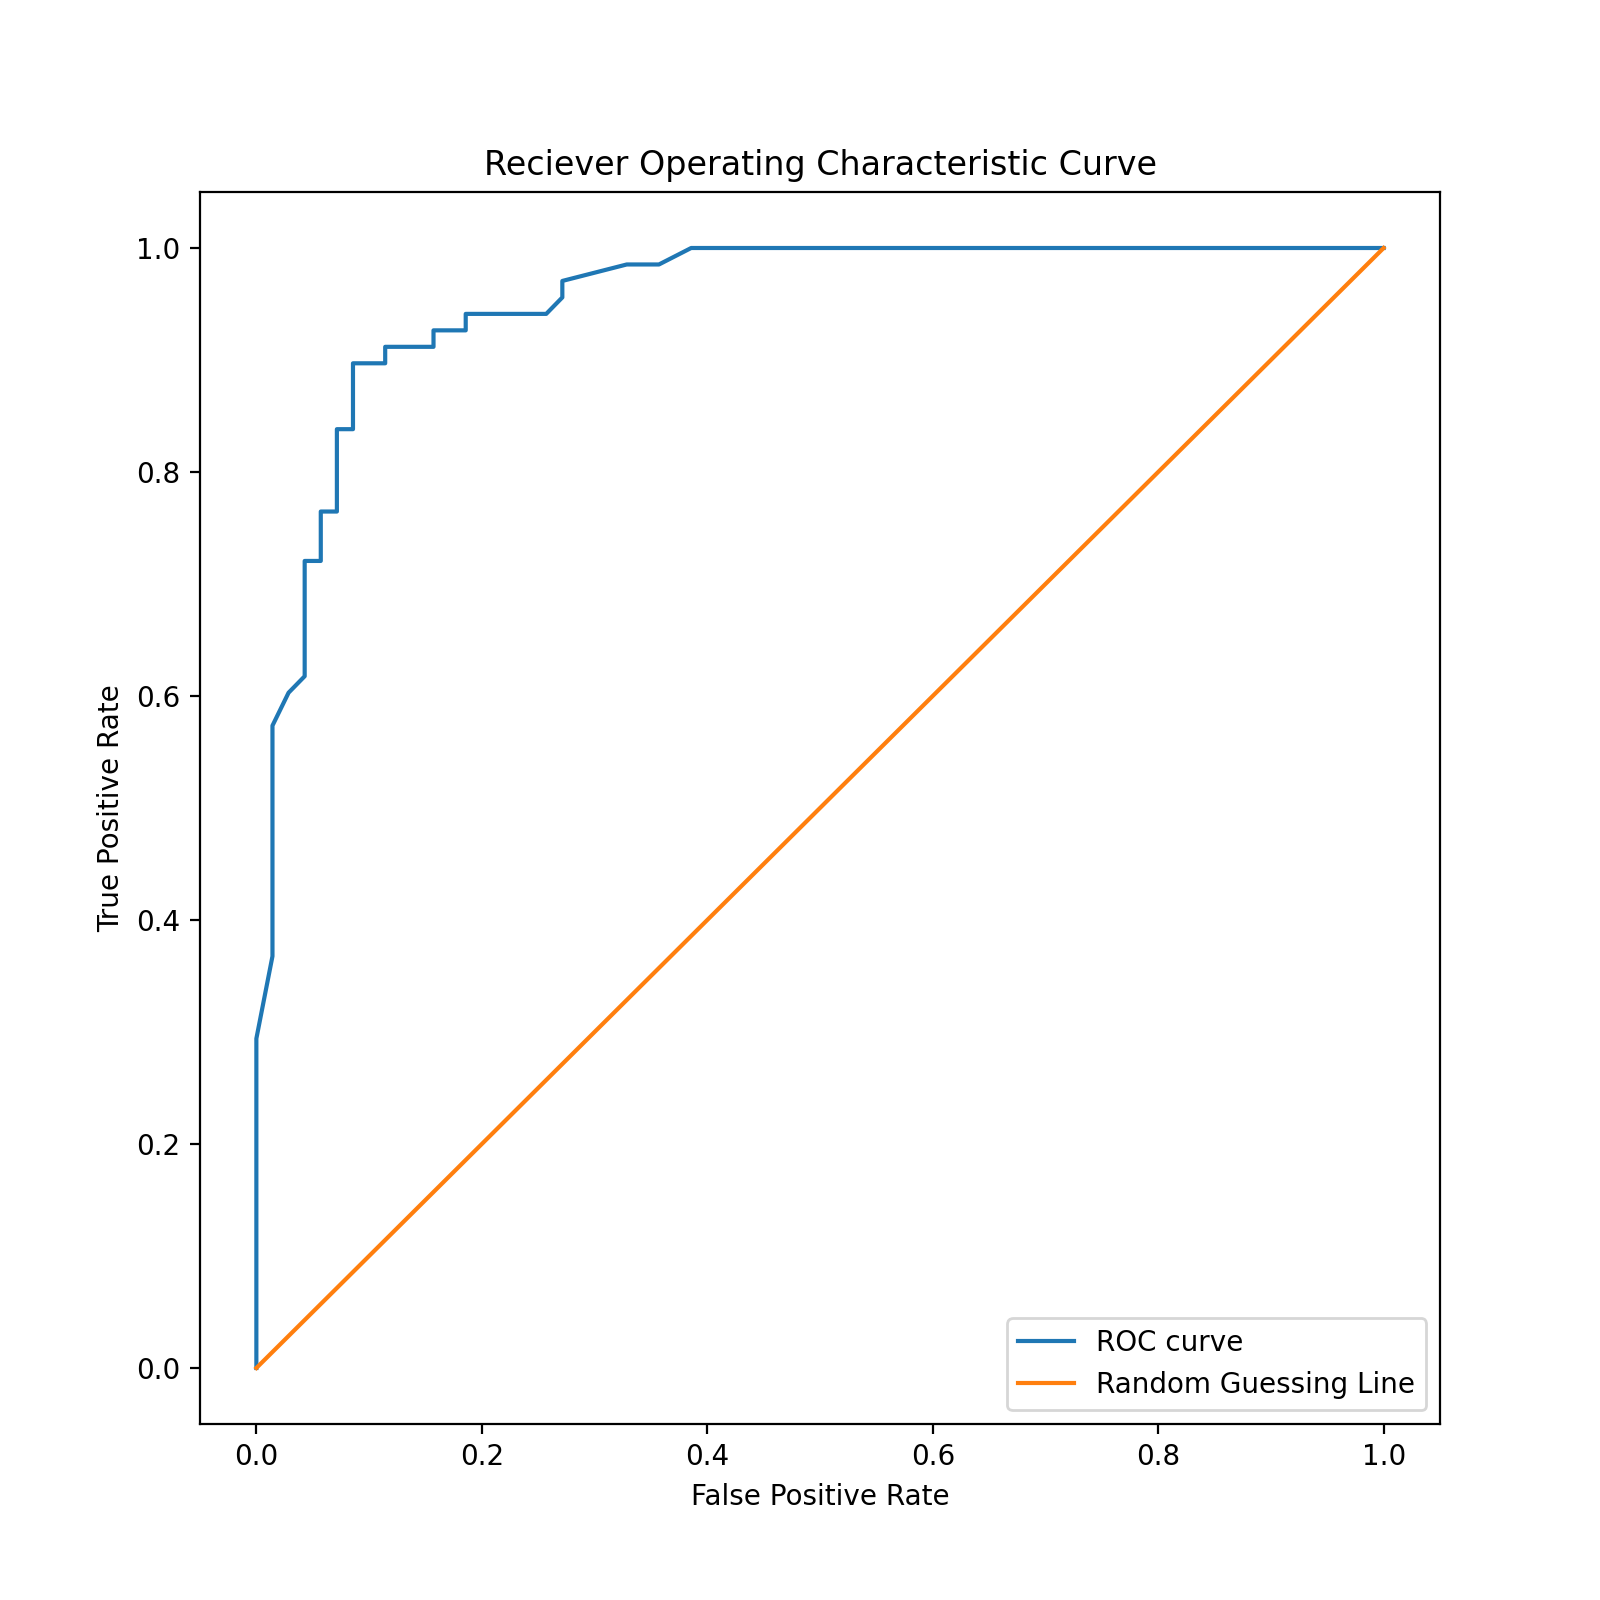

In [37]:
plt.figure(figsize=(8,8))
plt.plot(FPr, TPr, label = "ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic Curve")
plt.plot([0,1], [0,1], label="Random Guessing Line")
plt.legend(loc="lower right")
plt.show

**ROC curve on binaarse klassifikatsiooni mudeli graafiline esitlus mudeli toimimiest erinevate "thresholdide" juures kujundades mudeli tundlikkust ja spetsiifilisust.<br>Tundlikkus (TPR) mõõdab positiivsete juhtude õigesti tuvastatud osakaalu<br>Spetsiifilisus (FPR) mõõdab negatiivsete juhtude ekslikult positiivseteks klassifitiseeritud osakaalu<br>Meie mudeli skoor on 0.954, mis on päris hea tulemus - see näitab, et meie mudel suudab hästi eristada positiivseid ja negatiivseid vaatluseid.<br> ROC-AUC on tegelikult parem mõõdik suuremate andmetega mudelite puhul, kus andmestikud on tasakaalust väljas ja üleüldiselt on see hea graafiline viis tulemuslikkuse hindamiseks.<br> Joonisel olev diagonaalne joon esindab juhuslikkuse joont ehk 50/50 pakkumist. Kui meie mudeli joon oleks alla selle, siis ei oleks vahet kas langetada otsuseid mudeli tulemi põhjal või valida laenusaajaid suvaliselt.**

   ## Kasutatud allikad:
   https://courses.cs.ut.ee/2023/ids/fall/Main/HomePage<br>
   https://images.datacamp.com/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf<br>
   https://www.learndatasci.com/glossary/binary-classification/<br>
   https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf<br>